# Exercise:
  Get information from webpage with beatiful soup
  - https://www.crummy.com/software/BeautifulSoup/bs4/doc/
  - https://www.geeksforgeeks.org/python-web-scraping-tutorial/
  - https://github.com/html5lib/html5lib-python

- Get the links with python  job posts from this page: https://realpython.github.io/fake-jobs/
- Visualize job types.
- get another info from website you've chosen, ıf you have more time for this study.

# Solution:

In [81]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
import pandas as pd

In [41]:
url="https://realpython.github.io/fake-jobs/"
page=requests.get(url)

In [7]:
print(text)

<Response [200]>


In [42]:
page=BeautifulSoup(page.content,'html.parser')

In [43]:
type(page)

bs4.BeautifulSoup

In [44]:
print(page.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Fake Python
  </title>
  <link href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css" rel="stylesheet"/>
 </head>
 <body>
  <section class="section">
   <div class="container mb-5">
    <h1 class="title is-1">
     Fake Python
    </h1>
    <p class="subtitle is-3">
     Fake Jobs for Your Web Scraping Journey
    </p>
   </div>
   <div class="container">
    <div class="columns is-multiline" id="ResultsContainer">
     <div class="column is-half">
      <div class="card">
       <div class="card-content">
        <div class="media">
         <div class="media-left">
          <figure class="image is-48x48">
           <img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
          </figure>
         </div>
         <div class="media-content">
          <h2 c

In [21]:
print(page.title)

<title>Fake Python</title>


In [93]:
for link in page.find_all('a'):
    print(link.get('href'))

https://www.realpython.com
https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html
https://www.realpython.com
https://realpython.github.io/fake-jobs/jobs/energy-engineer-1.html
https://www.realpython.com
https://realpython.github.io/fake-jobs/jobs/legal-executive-2.html
https://www.realpython.com
https://realpython.github.io/fake-jobs/jobs/fitness-centre-manager-3.html
https://www.realpython.com
https://realpython.github.io/fake-jobs/jobs/product-manager-4.html
https://www.realpython.com
https://realpython.github.io/fake-jobs/jobs/medical-technical-officer-5.html
https://www.realpython.com
https://realpython.github.io/fake-jobs/jobs/physiological-scientist-6.html
https://www.realpython.com
https://realpython.github.io/fake-jobs/jobs/textile-designer-7.html
https://www.realpython.com
https://realpython.github.io/fake-jobs/jobs/television-floor-manager-8.html
https://www.realpython.com
https://realpython.github.io/fake-jobs/jobs/waste-management-officer-9.html
https://

In [23]:
images_list = [] 
  
images = page.select('title is-5') 
for image in images: 
    src = image.get('src') 
    alt = image.get('alt') 
    images_list.append({"src": src, "alt": alt}) 
      
for image in images_list: 
    print(image)

{'src': 'https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1', 'alt': 'Real Python Logo'}
{'src': 'https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1', 'alt': 'Real Python Logo'}
{'src': 'https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1', 'alt': 'Real Python Logo'}
{'src': 'https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1', 'alt': 'Real Python Logo'}
{'src': 'https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1', 'alt': 'Real Python Logo'}
{'src': 'https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1', 'alt': 'Real Python Logo'}
{'src': 'https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1', 'alt': 'Real Python Logo'}
{'src': 'https://files.realpython.com/media/real-python-logo-t

In [34]:
job_listings = []
# İş ilanlarının belirli bir HTML yapısı içinde olduğunu varsayalım 
for job_elem in page.find_all('div', class_='media-content'):
    title_elem = job_elem.find('h2', class_='title is-5')

    if None in (title_elem):
        continue  # Eğer gerekli elementlerden biri eksikse bu iş ilanını atla

    title_text = title_elem.get_text(strip=True)

    # Sadece Python içeren başlıkları ekleyelim
    if 'Python' in title_text:
        job_listings.append({'title': title_text})

# Sadece Python içeren iş ilanlarını görselleştir
for job in job_listings:
    print(f"Başlık: {job['title']}")
    print("-" * 30)

Başlık: Senior Python Developer
------------------------------
Başlık: Software Engineer (Python)
------------------------------
Başlık: Python Programmer (Entry-Level)
------------------------------
Başlık: Python Programmer (Entry-Level)
------------------------------
Başlık: Software Developer (Python)
------------------------------
Başlık: Python Developer
------------------------------
Başlık: Back-End Web Developer (Python, Django)
------------------------------
Başlık: Back-End Web Developer (Python, Django)
------------------------------
Başlık: Python Programmer (Entry-Level)
------------------------------
Başlık: Software Developer (Python)
------------------------------


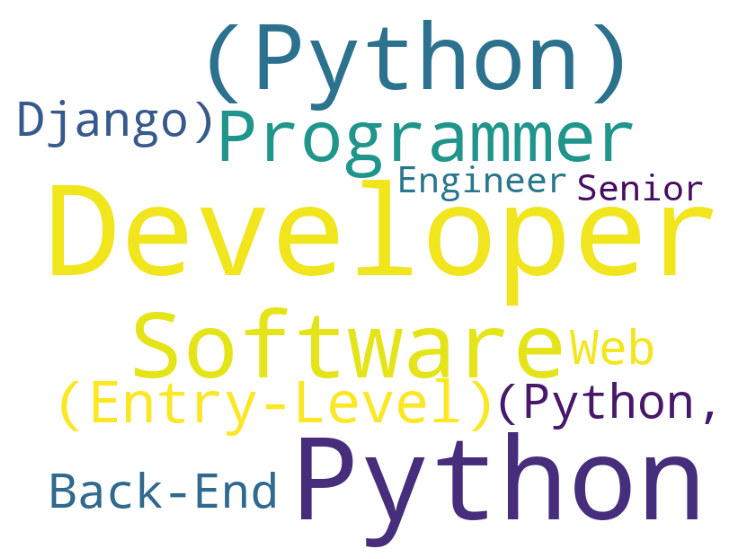

In [39]:
from collections import Counter

# İş başlıklarından kelime frekanslarını hesapla
all_job_titles = " ".join(job['title'] for job in job_listings)
word_freq = Counter(all_job_titles.split())

# İlk 20 kelimeyi seç
res = word_freq.most_common(20)

# WordCloud nesnesini oluştur
wc = WordCloud(background_color='white', width=800, height=600)

# WordCloud'u görselleştir
plt.figure(figsize=(15, 7))
plt.imshow(wc.generate_from_frequencies({k: v for k, v in res}))
plt.axis("off")
plt.show()

## Buraya kadar  grup çalışması bundan sonra Derste yapılan

In [45]:
results = page.find(id="ResultsContainer")
print(results.prettify())

<div class="columns is-multiline" id="ResultsContainer">
 <div class="column is-half">
  <div class="card">
   <div class="card-content">
    <div class="media">
     <div class="media-left">
      <figure class="image is-48x48">
       <img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
      </figure>
     </div>
     <div class="media-content">
      <h2 class="title is-5">
       Senior Python Developer
      </h2>
      <h3 class="subtitle is-6 company">
       Payne, Roberts and Davis
      </h3>
     </div>
    </div>
    <div class="content">
     <p class="location">
      Stewartbury, AA
     </p>
     <p class="is-small has-text-grey">
      <time datetime="2021-04-08">
       2021-04-08
      </time>
     </p>
    </div>
    <footer class="card-footer">
     <a class="card-footer-item" href="https://www.realpython.com" target="_blank">
      Learn
     </a>
     <a class="card-footer-item" href=

In [46]:
job_elements=page.find_all("div",class_="card-content")

In [55]:
print(f"There are total{len(job_elements)} jobs")
print("\n")
for job_element in  job_elements:
    title_element =job_element.find("h2",class_="title")
    company_element=job_element.find("h3",class_="company")
    location_element=job_element.find("p",class_="location")
    print(title_element.text.strip())
    #strip boşlukları kaldırmak için
    print(company_element.text.strip())
    print(location_element.text.strip())
    print("\n")

There are total100 jobs


Senior Python Developer
Payne, Roberts and Davis
Stewartbury, AA


Energy engineer
Vasquez-Davidson
Christopherville, AA


Legal executive
Jackson, Chambers and Levy
Port Ericaburgh, AA


Fitness centre manager
Savage-Bradley
East Seanview, AP


Product manager
Ramirez Inc
North Jamieview, AP


Medical technical officer
Rogers-Yates
Davidville, AP


Physiological scientist
Kramer-Klein
South Christopher, AE


Textile designer
Meyers-Johnson
Port Jonathan, AE


Television floor manager
Hughes-Williams
Osbornetown, AE


Waste management officer
Jones, Williams and Villa
Scotttown, AP


Software Engineer (Python)
Garcia PLC
Ericberg, AE


Interpreter
Gregory and Sons
Ramireztown, AE


Architect
Clark, Garcia and Sosa
Figueroaview, AA


Meteorologist
Bush PLC
Kelseystad, AA


Audiological scientist
Salazar-Meyers
Williamsburgh, AE


English as a second language teacher
Parker, Murphy and Brooks
Mitchellburgh, AE


Surgeon
Cruz-Brown
West Jessicabury, AA


Equities

In [56]:
python_jobs=page.find_all(
    "h2" , string=lambda text:"python" in text.lower()
)

In [59]:
for job in python_jobs:
    print(job)

<h2 class="title is-5">Senior Python Developer</h2>
<h2 class="title is-5">Software Engineer (Python)</h2>
<h2 class="title is-5">Python Programmer (Entry-Level)</h2>
<h2 class="title is-5">Python Programmer (Entry-Level)</h2>
<h2 class="title is-5">Software Developer (Python)</h2>
<h2 class="title is-5">Python Developer</h2>
<h2 class="title is-5">Back-End Web Developer (Python, Django)</h2>
<h2 class="title is-5">Back-End Web Developer (Python, Django)</h2>
<h2 class="title is-5">Python Programmer (Entry-Level)</h2>
<h2 class="title is-5">Software Developer (Python)</h2>


In [61]:
for job in python_jobs:
    print(job.find_all('a'))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [64]:
python_job_elements= [
    h2_element.parent.parent.parent for h2_element in python_jobs
]

In [73]:
for job_element in python_job_elements:
    links = job_element.find_all('a')
    for link in links:
        print(link.text.strip())

Learn
Apply
Learn
Apply
Learn
Apply
Learn
Apply
Learn
Apply
Learn
Apply
Learn
Apply
Learn
Apply
Learn
Apply
Learn
Apply


In [72]:
for job_element in python_job_elements:
    links = job_element.find_all('a')
    for link in links:
        if link.text == "Apply":
            print(link)

<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/software-engineer-python-10.html" target="_blank">Apply</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-20.html" target="_blank">Apply</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-30.html" target="_blank">Apply</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/software-developer-python-40.html" target="_blank">Apply</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/python-developer-50.html" target="_blank">Apply</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/back-end-web-developer-python-django-60.html" target="_blank">Apply</a>
<a class="card-footer

In [71]:
for job_element in python_job_elements:
    links=job_element.find_all('a')
    for link in links:
       if link.text == "Apply":
        link_url =link['href']
        print(f"Apply here: {link_url}\n") 


Apply here: https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html

Apply here: https://realpython.github.io/fake-jobs/jobs/software-engineer-python-10.html

Apply here: https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-20.html

Apply here: https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-30.html

Apply here: https://realpython.github.io/fake-jobs/jobs/software-developer-python-40.html

Apply here: https://realpython.github.io/fake-jobs/jobs/python-developer-50.html

Apply here: https://realpython.github.io/fake-jobs/jobs/back-end-web-developer-python-django-60.html

Apply here: https://realpython.github.io/fake-jobs/jobs/back-end-web-developer-python-django-70.html

Apply here: https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-80.html

Apply here: https://realpython.github.io/fake-jobs/jobs/software-developer-python-90.html



In [74]:
jobs_list = []
for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    job_title = title_element.text.strip()
    print(job_title)
    jobs_list.append(job_title)

Senior Python Developer
Energy engineer
Legal executive
Fitness centre manager
Product manager
Medical technical officer
Physiological scientist
Textile designer
Television floor manager
Waste management officer
Software Engineer (Python)
Interpreter
Architect
Meteorologist
Audiological scientist
English as a second language teacher
Surgeon
Equities trader
Newspaper journalist
Materials engineer
Python Programmer (Entry-Level)
Product/process development scientist
Scientist, research (maths)
Ecologist
Materials engineer
Historic buildings inspector/conservation officer
Data scientist
Psychiatrist
Structural engineer
Immigration officer
Python Programmer (Entry-Level)
Neurosurgeon
Broadcast engineer
Make
Nurse, adult
Air broker
Editor, film/video
Production assistant, radio
Engineer, communications
Sales executive
Software Developer (Python)
Futures trader
Tour manager
Cytogeneticist
Designer, multimedia
Trade union research officer
Chemist, analytical
Programmer, multimedia
Engineer, b

In [79]:
len(jobs_list)

100

In [83]:
df=pd.DataFrame(jobs_list , columns=["job_title"])


In [84]:
df.sample(5)

,job_title
54,Bonds trader
87,"Programmer, applications"
81,Warden/ranger
48,"Engineer, broadcasting (operations)"
39,Sales executive


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job_title  100 non-null    object
dtypes: object(1)
memory usage: 932.0+ bytes


In [86]:
df['job_title'].str.lower(
)
#tüm string verileri küçük harf yapma

0                senior python developer
1                        energy engineer
2                        legal executive
3                 fitness centre manager
4                        product manager
                     ...                
95    museum/gallery exhibitions officer
96              radiographer, diagnostic
97                database administrator
98                    furniture designer
99                           ship broker
Name: job_title, Length: 100, dtype: object

In [87]:
df['job_title'].str.lower().str.contains("python")

0      True
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: job_title, Length: 100, dtype: bool

In [88]:
df[df['job_title'].str.lower().str.contains("python")]

,job_title
0,Senior Python Developer
10,Software Engineer (Python)
20,Python Programmer (Entry-Level)
30,Python Programmer (Entry-Level)
40,Software Developer (Python)
50,Python Developer
60,"Back-End Web Developer (Python, Django)"
70,"Back-End Web Developer (Python, Django)"
80,Python Programmer (Entry-Level)
90,Software Developer (Python)


In [89]:
location_list = []
for job_element in job_elements:
    location_element = job_element.find("p", class_="location")
    location = location_element.text.strip()
    print(location)
    location_list.append(location)

Stewartbury, AA
Christopherville, AA
Port Ericaburgh, AA
East Seanview, AP
North Jamieview, AP
Davidville, AP
South Christopher, AE
Port Jonathan, AE
Osbornetown, AE
Scotttown, AP
Ericberg, AE
Ramireztown, AE
Figueroaview, AA
Kelseystad, AA
Williamsburgh, AE
Mitchellburgh, AE
West Jessicabury, AA
Maloneshire, AE
Johnsonton, AA
South Davidtown, AP
Port Sara, AE
Marktown, AA
Laurenland, AE
Lauraton, AP
South Tammyberg, AP
North Brandonville, AP
Port Robertfurt, AA
Burnettbury, AE
Herbertside, AA
Christopherport, AP
West Victor, AE
Port Aaron, AP
Loribury, AA
Angelastad, AP
Larrytown, AE
West Colin, AP
West Stephanie, AP
Laurentown, AP
Wrightberg, AP
Alberttown, AE
Brockburgh, AE
North Jason, AE
Arnoldhaven, AE
Lake Destiny, AP
South Timothyburgh, AP
New Jimmyton, AE
New Lucasbury, AP
Port Cory, AE
Gileston, AA
Cindyshire, AA
East Michaelfort, AA
Joybury, AE
Emmatown, AE
Colehaven, AP
Port Coryton, AE
Amyborough, AA
Reynoldsville, AA
Port Billy, AP
Adamburgh, AA
Wilsonmouth, AA
South Kimb

In [90]:
location = pd.Series(location_list, name="location")

In [91]:

df["location"] = location

In [92]:
df.sample(5)

,job_title,location
98,Furniture designer,"North Tiffany, AA"
9,Waste management officer,"Scotttown, AP"
80,Python Programmer (Entry-Level),"Robertborough, AP"
84,Printmaker,"North Patty, AE"
90,Software Developer (Python),"Martinezburgh, AE"
